#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 
The company aims to achieve an 80% lead conversion rate through a model that assigns lead scores to each lead.

***Goal:***  

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted

## 1. Import packages

In [226]:
# Importing the required packages
import warnings

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [227]:
warnings.filterwarnings('ignore')
sns.set_palette('muted')

# 2. Load the data

In [228]:
# Read the csv file
df_leads = pd.read_csv('Leads.csv')

In [229]:
# inspect the data
df_leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [230]:
df_leads.shape

(9240, 37)

In [231]:
# check the field datatypes and null value counts 
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [232]:
# check the numerical field details
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [233]:
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [234]:
df_leads['Converted'].value_counts(normalize=True)

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

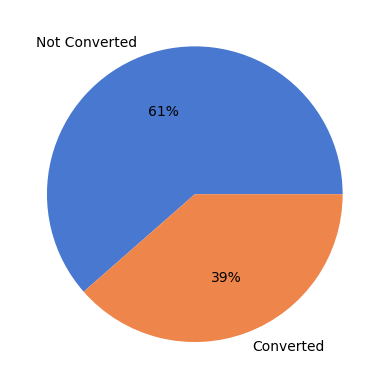

In [235]:
df_leads['Converted'].value_counts(normalize=True).plot.pie(autopct='%.0f%%',labels=['Not Converted','Converted'])
plt.ylabel('')
plt.show()

**Observations**  
- There are 9240 rows and 37 columns in the data set. 
- There are null values in some of the columns that need to be reviewed and cleaned.
- The split between converted and not converted leads in the dataset is approximately 39% to 61%

# 3. Data Prep

## 3.1 Missing values

In [236]:
# Percentage of null values in each column- displaying in descending order
100*df_leads.isnull().mean().sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

**Observations** 
- There are 13 columns with more than 15% of null values in them. 
- Columns with 30% or more null values can be dropped due to missing information

## 3.2 Missing values > 30%

In [237]:
# Identify null columns with more than 30% missing values
cut_off=30
criteria = 100*df_leads.isnull().mean()>cut_off
cols_to_drop= list(df_leads.columns[criteria])
print(f'Columns to be dropped: {cols_to_drop}')
print(f'Num of columns having missing values more than 30% : {len(cols_to_drop)}')


Columns to be dropped: ['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
Num of columns having missing values more than 30% : 6


In [238]:
# Drop columns having missing values more than 30%
df_leads.drop(columns = cols_to_drop, inplace = True)

In [239]:
# Percentage of null values in each column - displaying in descending order
100*df_leads.isnull().mean().sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

## 3.3 Missing values > 15%

In [240]:
cut_off=15
criteria=100*df_leads.isnull().mean()>cut_off
cols_gt_15= list(df_leads.columns[criteria])
print(cols_gt_15)

['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City']


In [241]:
# Check the percentage distribution of data within each columns across the differnet values
for c in cols_gt_15:
    print('=================================')
    print(100*df_leads[c].value_counts()/df_leads.shape[0])

Country
India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switze

**Observations**  
 
 - `Country` : Majority of the values are `India` (>70%). This column can be **dropped** as it doesnt provided significant insight
 - `How did you hear about X Education` : More than 50% have `Select` as a value which is as good as missing. Including the null rows it totals to around 79% rows with missing data for this column. This column can be **dropped**
 - `Lead Profile` : >44% have a value `Select` which means the user has not selected an option. These are as good as missing values including the null values it totals to around 73% rows with missing data for this column. It can be **dropped** 
 - `City` : Most of them (34%) are `Mumbai`. 24% has no value selected and 15% are null. The rest are <10%. It can be **dropped**
 - `What matters most to you in choosing a course` : Majority (>70%) are `Better Career Prospects`. The data is skewed towards one value. It can be **dropped** 
 - `What is your current occupation` : Most of the values are `Unemployed`. But occupation is tied with ability to enroll. We probably should only **drop the null rows** for this column. 
 - `Specialization` : >20% have a value `Select` which means the user has not selected an option. These are as good as missing values. There are also 29% missing values which totals to around 50% rows with missing information.

In [242]:
# Drop the identified columns
cols_to_drop = ['Country','How did you hear about X Education','What matters most to you in choosing a course','Lead Profile','City']
df_leads.drop(columns = cols_to_drop, inplace = True)

In [243]:
# Drop only the null rows for current occupation column
df_leads = df_leads[~pd.isnull(df_leads['What is your current occupation'])]

In [244]:
# Check the null value percentage
100*df_leads.isnull().mean().sort_values(ascending=False)

TotalVisits                                 1.984733
Page Views Per Visit                        1.984733
Last Activity                               1.572519
Lead Source                                 0.549618
Specialization                              0.274809
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Search                                      0.000000
Newspaper Article                           0.000000
Magazine                                    0.000000
Lead Number                                 0.

**Observations** 
- This reduces the missing columns to a very small number

## 3.4 Missing values - remaining 

In [245]:
df_leads.shape

(6550, 26)

In [246]:
# Check the null values
df_leads.isnull().sum().sort_values(ascending=False)

TotalVisits                                 130
Page Views Per Visit                        130
Last Activity                               103
Lead Source                                  36
Specialization                               18
Prospect ID                                   0
X Education Forums                            0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
Search                                        0
Newspaper Article                             0
Magazine                                      0
Lead Number                                   0
What is your current occupation               0
Total Time Spent on Website             

In [247]:
# Drop only null rows for TotalVisits column
df_leads = df_leads[~pd.isnull(df_leads['TotalVisits'])]

In [248]:
# Check the null values again
df_leads.isnull().sum().sort_values(ascending=False)

Lead Source                                 29
Specialization                              18
Prospect ID                                  0
Magazine                                     0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Search                                       0
Lead Number                                  0
What is your current occupation              0
Last Activity                                0
Page Views Per Visit                         0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted    

In [249]:
df_leads.shape

(6420, 26)

In [250]:
# Drop only null rows for Lead Source column
df_leads = df_leads[~pd.isnull(df_leads['Lead Source'])]

In [251]:
# Check the null values again
df_leads.isnull().sum().sort_values(ascending=False)

Specialization                              18
Prospect ID                                  0
Magazine                                     0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Search                                       0
Lead Number                                  0
What is your current occupation              0
Last Activity                                0
Page Views Per Visit                         0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted                                    0
Do Not Call  

In [252]:
df_leads.shape

(6391, 26)

In [253]:
# Drop only null rows for Specialization column
df_leads = df_leads[~pd.isnull(df_leads['Specialization'])]

In [254]:
# Check the null values again
df_leads.isnull().sum().sort_values(ascending=False)

Prospect ID                                 0
Lead Number                                 0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
Search                                      0
What is your current occupation             0
Specialization                              0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                       

**Observations**
- There are no more null values in the dataset
- This completes the cleanup for missing values

In [255]:
df_leads.shape

(6373, 26)

## 3.4 Drop unwanted columns

In [256]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               6373 non-null   object 
 1   Lead Number                               6373 non-null   int64  
 2   Lead Origin                               6373 non-null   object 
 3   Lead Source                               6373 non-null   object 
 4   Do Not Email                              6373 non-null   object 
 5   Do Not Call                               6373 non-null   object 
 6   Converted                                 6373 non-null   int64  
 7   TotalVisits                               6373 non-null   float64
 8   Total Time Spent on Website               6373 non-null   int64  
 9   Page Views Per Visit                      6373 non-null   float64
 10  Last Activity                            

In [257]:
df_leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


**Observations**
- `Prospect ID` and `Lead Number` can be dropped as they only serve are row idenfiers

In [258]:
df_leads.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [259]:
# Get the list of all categorical columns
ind = df_leads.dtypes[df_leads.dtypes==np.dtype('O')].index
cat_cols = list(ind)
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


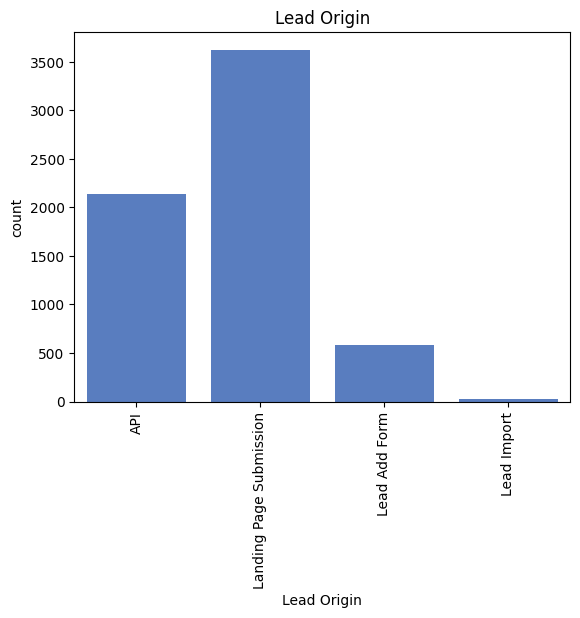

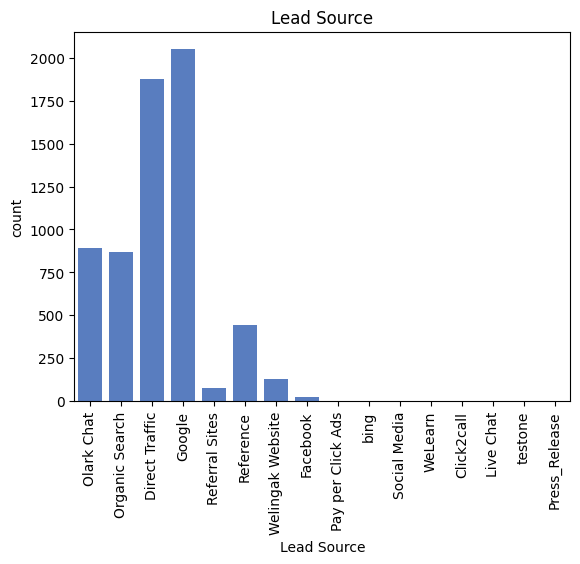

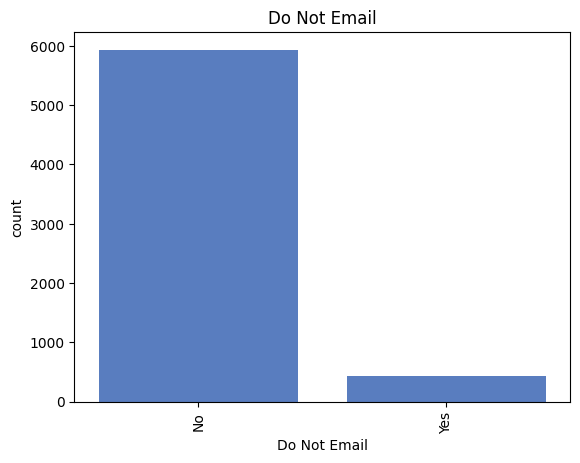

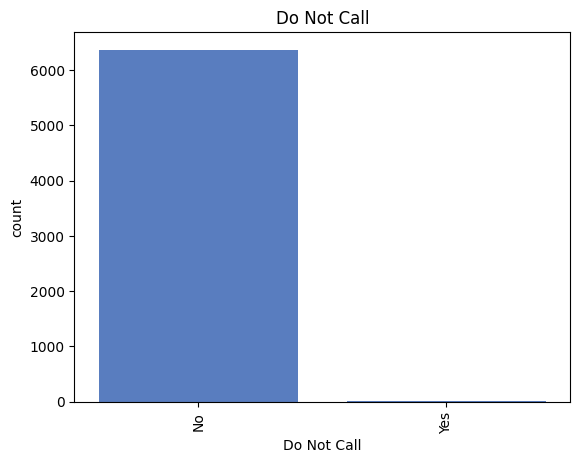

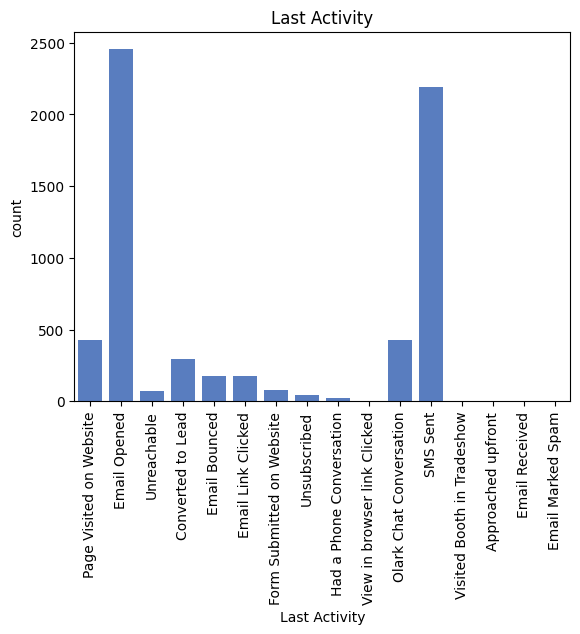

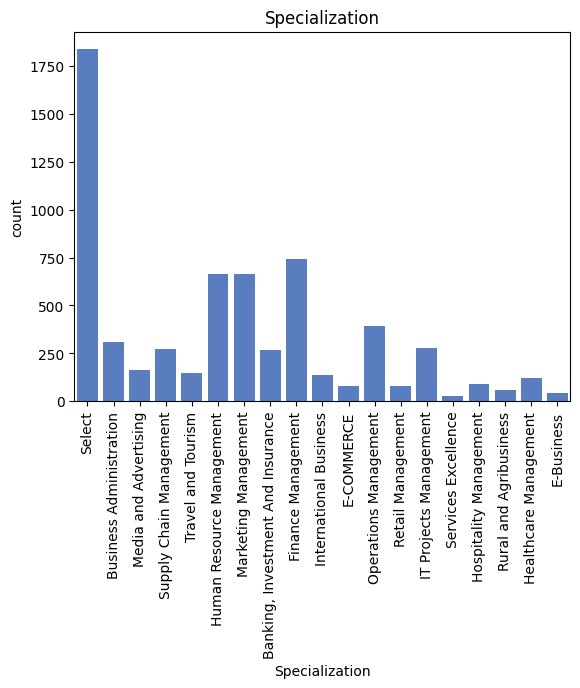

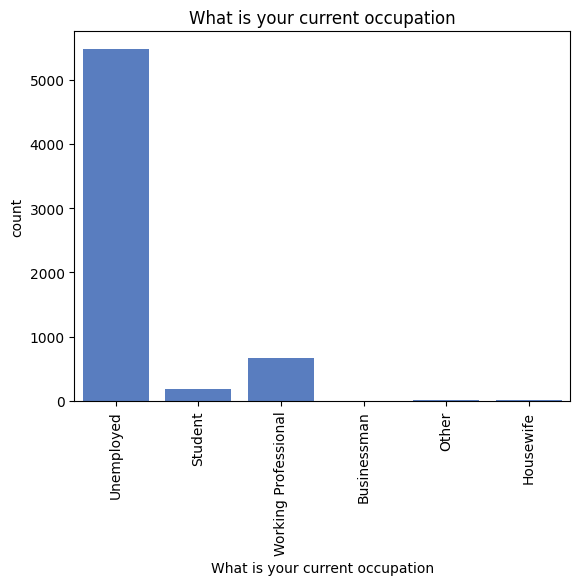

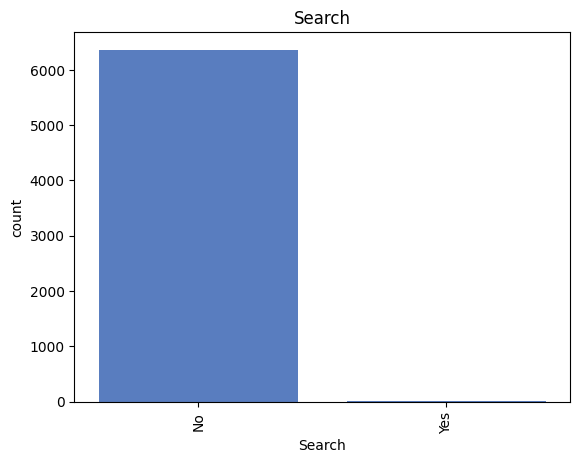

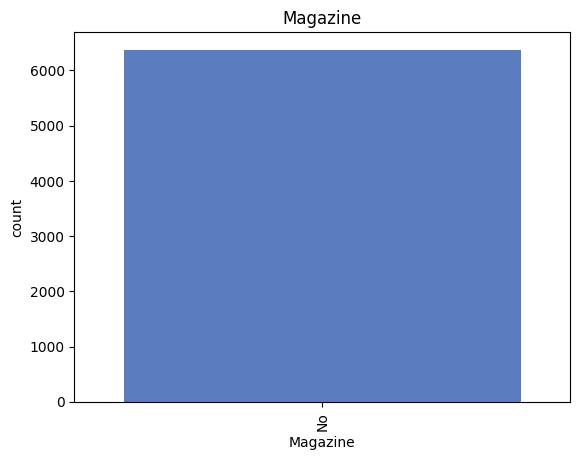

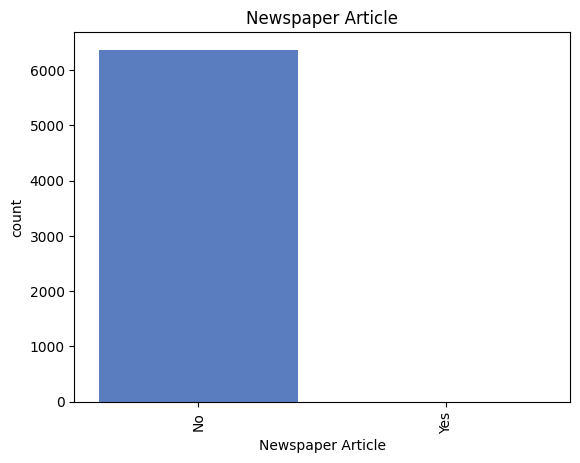

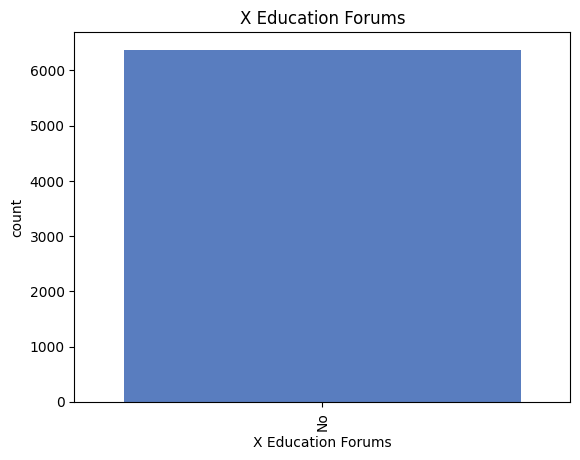

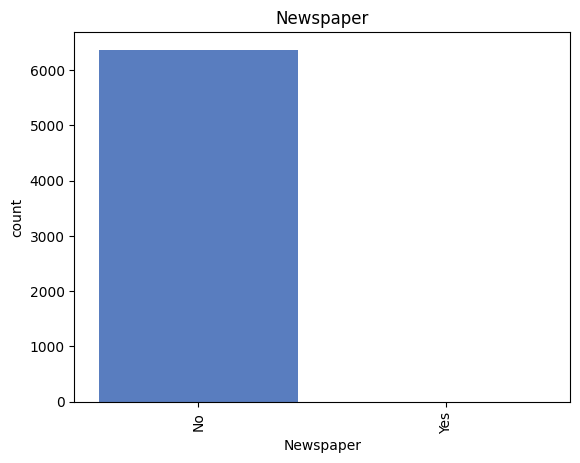

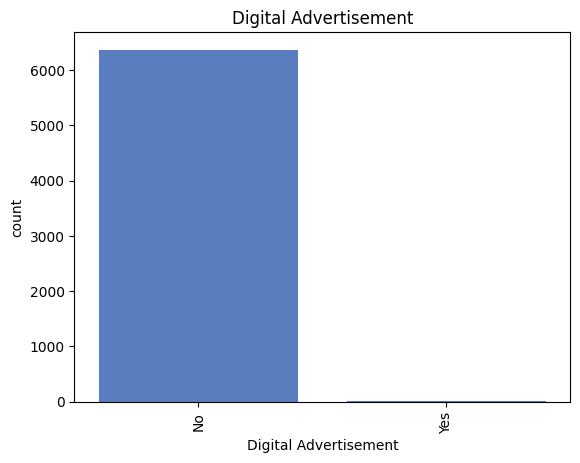

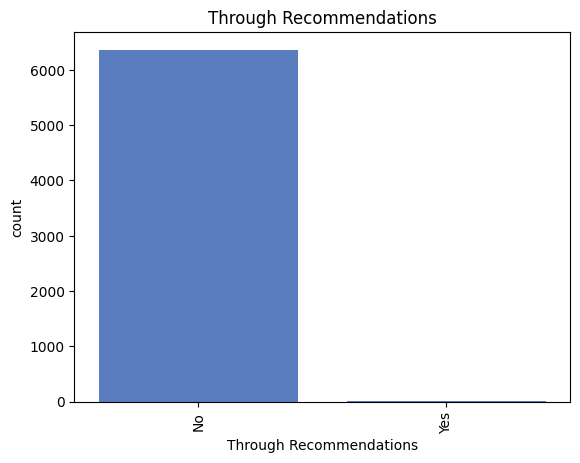

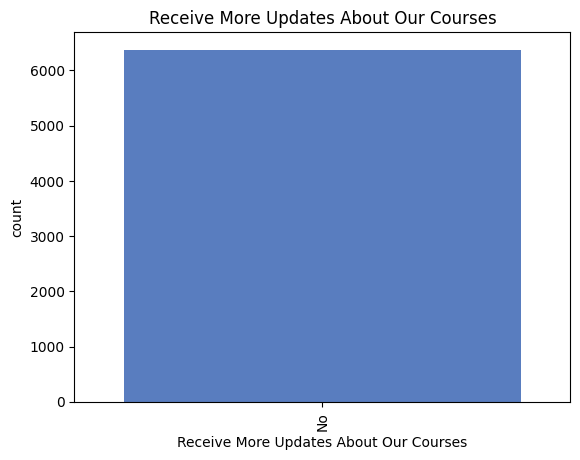

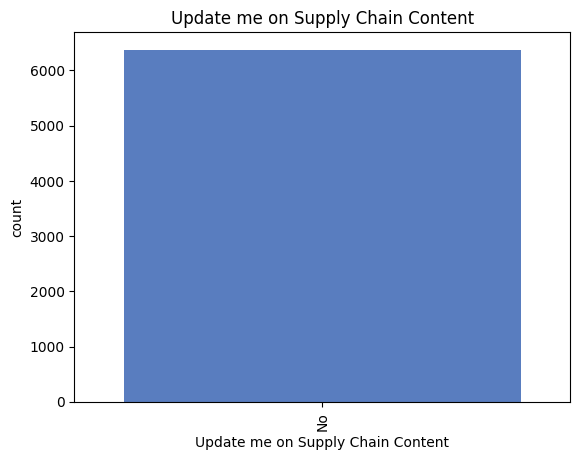

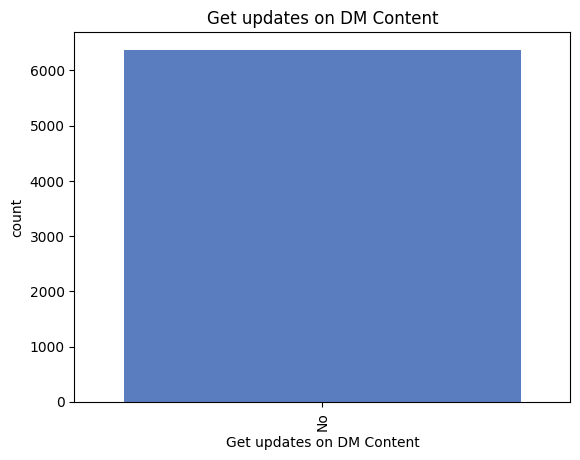

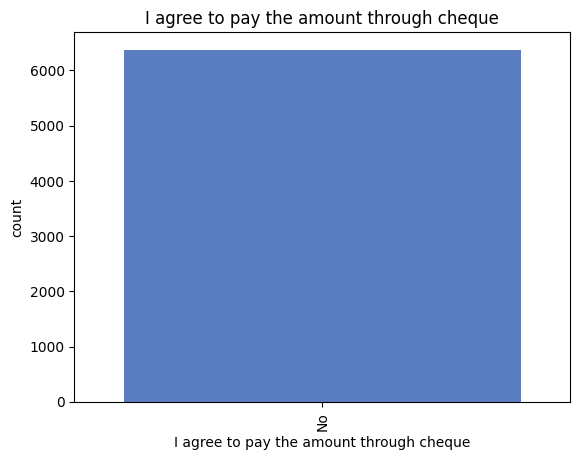

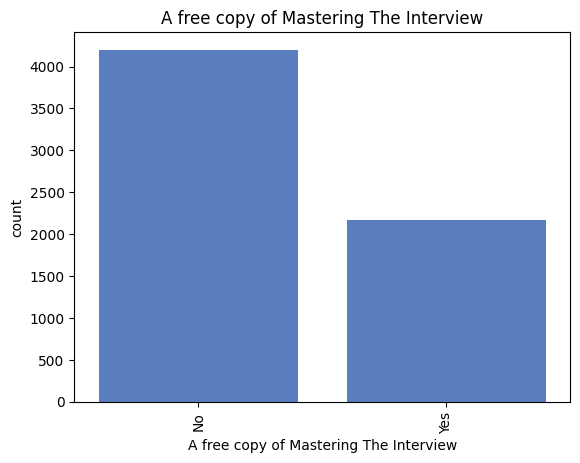

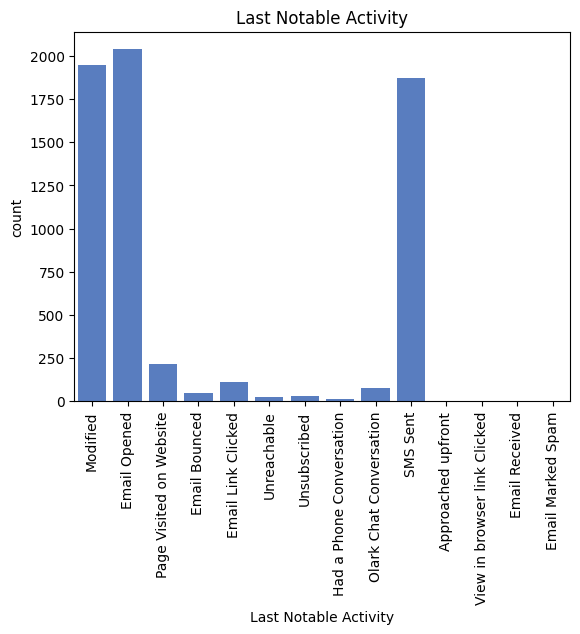

In [260]:
# Plot the data distribution within each categorical column
for c in cat_cols:
    sns.countplot(data=df_leads,x=c)
    plt.title(c)
    plt.xticks(rotation=90)
    plt.show()

**Inference**  
The data in the following columns is heavily skewed to one value. These columns can be dropped
- `Update me on Supply Chain Content`
- `Get updates on DM Content`
- `I agree to pay the amount through cheque`
- `Do Not Call`
- `Newspaper Article`
- `Digital Advertisement`
- `Through Recommendations`
- `X Education Forums`
- `Search`
- `Magazine`
- `Newspaper`
- `Receive More Updates About Our Courses`

In [261]:
# Drop the identified columns
# df_leads.drop(columns=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
#             'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
#             'Update me on Supply Chain Content', 'Get updates on DM Content', 
#             'I agree to pay the amount through cheque'], inplace = True)
df_leads.drop(columns=['Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
            'Do Not Call','Newspaper Article','Digital Advertisement','Through Recommendations','X Education Forums',
            'Search','Magazine','Newspaper','Receive More Updates About Our Courses'], inplace = True)

In [262]:
df_leads.shape

(6373, 12)

**Observations**
- The cleaned up data includes 6373 rows and 12 columns out of 9240 rows and 37 columns 
- Almost 30% of data was removed during the clean up and rest will be used for EDA and model building

# 4. EDA

## 4.1 Analyze Categorical Variabels

In [263]:
# Function to calcuate and display the conversion rate within a given column
def display_conversion_rate(col):
    conv = df_leads[col][df_leads['Converted']==1].value_counts()
    not_conv = df_leads[col][df_leads['Converted']==0].value_counts()
    tot = conv + not_conv
    p_df=pd.DataFrame({
        'Conversion Rate':100*conv/tot
    })
    print(p_df.sort_values(by='Conversion Rate',ascending=False))

In [264]:
# Get the list of all categorical columns
ind = df_leads.dtypes[df_leads.dtypes==np.dtype('O')].index
cat_cols = list(ind)
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


                         Conversion Rate
Lead Origin                             
Lead Add Form                  93.631670
API                            44.579439
Landing Page Submission        42.979310
Lead Import                    33.333333


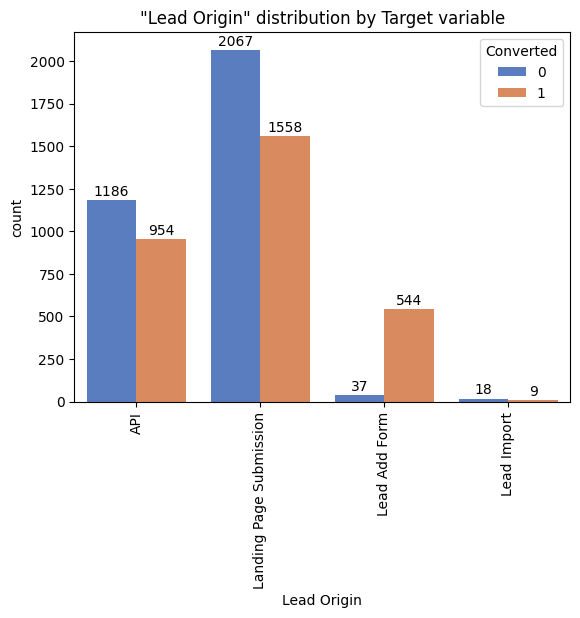

                   Conversion Rate
Lead Source                       
Welingak Website         98.449612
Reference                92.550790
Click2call               75.000000
Social Media             50.000000
Google                   49.560547
Organic Search           43.793103
Olark Chat               42.600897
Direct Traffic           37.746930
Referral Sites           37.333333
bing                     33.333333
Facebook                 32.142857
Live Chat                      NaN
Pay per Click Ads              NaN
Press_Release                  NaN
WeLearn                        NaN
testone                        NaN


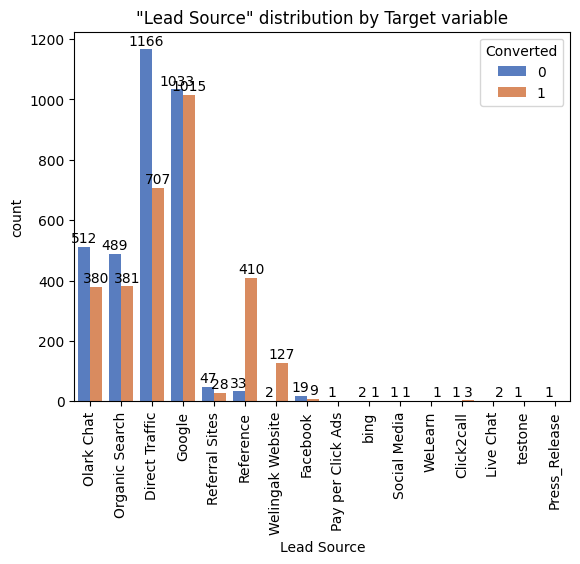

              Conversion Rate
Do Not Email                 
No                  50.101044
Yes                 20.689655


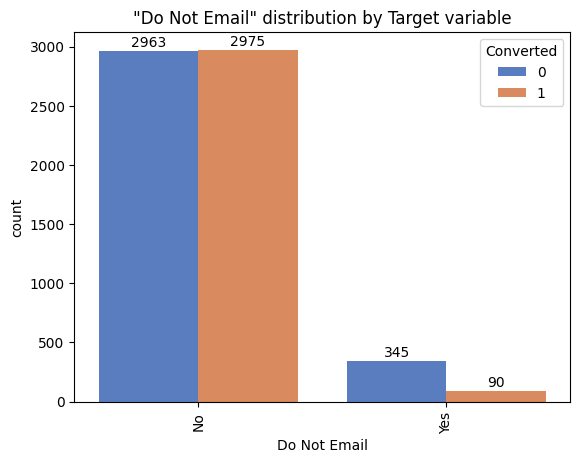

                              Conversion Rate
Last Activity                                
Had a Phone Conversation            82.608696
SMS Sent                            67.839196
Email Opened                        46.680244
Email Link Clicked                  38.202247
Unreachable                         38.028169
Form Submitted on Website           32.098765
Page Visited on Website             31.850117
Unsubscribed                        27.500000
View in browser link Clicked        25.000000
Olark Chat Conversation             17.523364
Converted to Lead                   16.438356
Email Bounced                        8.000000
Approached upfront                        NaN
Email Marked Spam                         NaN
Email Received                            NaN
Visited Booth in Tradeshow                NaN


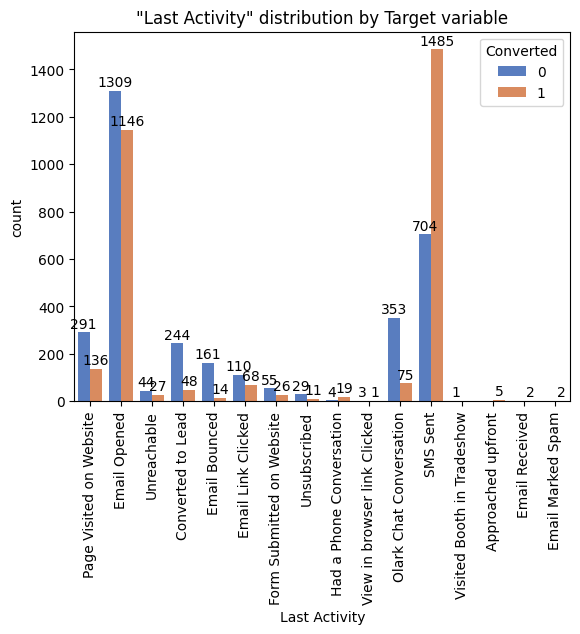

                                   Conversion Rate
Specialization                                    
Healthcare Management                    58.196721
Banking, Investment And Insurance        56.766917
Marketing Management                     55.354449
Operations Management                    54.219949
Human Resource Management                51.879699
Finance Management                       51.812081
Rural and Agribusiness                   51.724138
Business Administration                  51.290323
Supply Chain Management                  49.454545
Media and Advertising                    47.826087
IT Projects Management                   46.762590
Hospitality Management                   45.555556
Travel and Tourism                       44.295302
Services Excellence                      44.000000
E-COMMERCE                               41.250000
Select                                   40.750816
Retail Management                        39.743590
International Business         

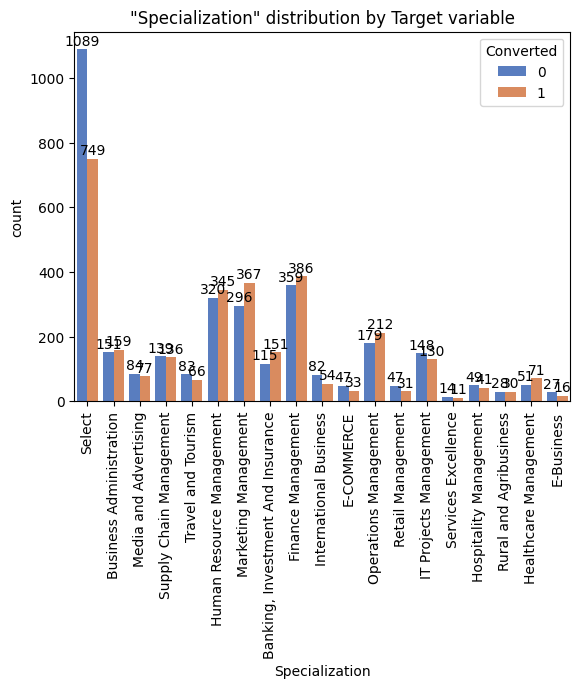

                                 Conversion Rate
What is your current occupation                 
Working Professional                   92.421991
Businessman                            71.428571
Other                                  60.000000
Unemployed                             42.841490
Student                                38.341969
Housewife                                    NaN


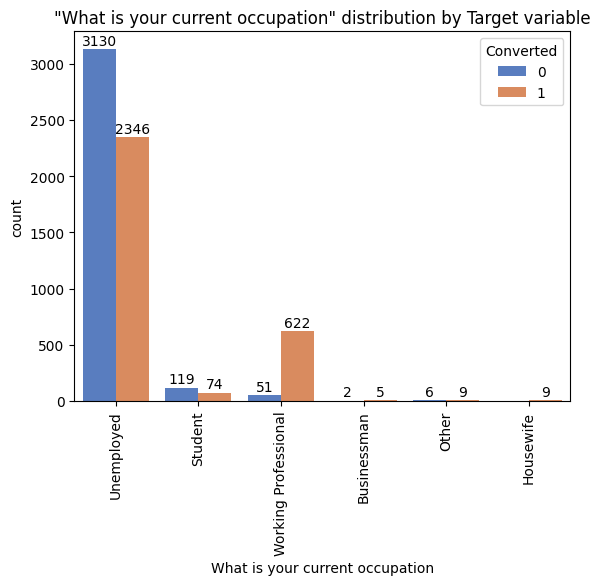

                                        Conversion Rate
A free copy of Mastering The Interview                 
No                                            51.499286
Yes                                           41.501612


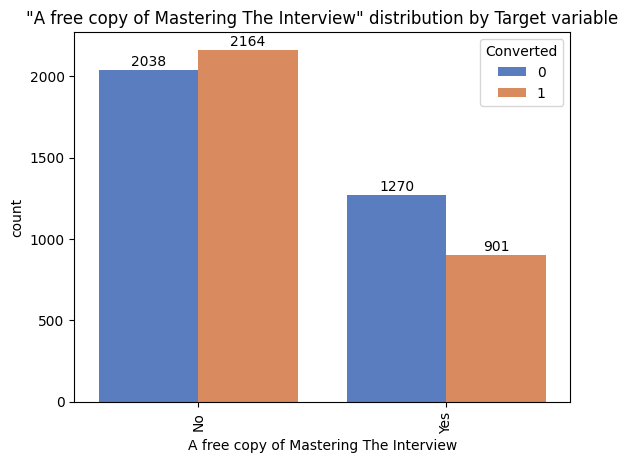

                              Conversion Rate
Last Notable Activity                        
Unreachable                         90.909091
SMS Sent                            70.144462
Email Opened                        47.350343
Page Visited on Website             39.436620
Email Link Clicked                  38.181818
Olark Chat Conversation             30.263158
Modified                            30.046225
Unsubscribed                        29.032258
Email Bounced                       18.367347
Approached upfront                        NaN
Email Marked Spam                         NaN
Email Received                            NaN
Had a Phone Conversation                  NaN
View in browser link Clicked              NaN


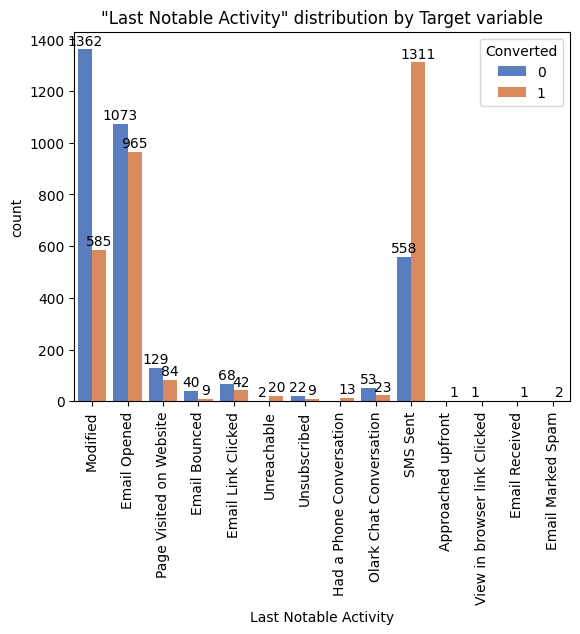

In [265]:
# Loop through the categorical columns and check the countplots
for c in cat_cols:
    display_conversion_rate(c)
    ax = sns.countplot(data=df_leads,x=c,hue='Converted')
    for container in ax.containers:
        ax.bar_label(container,padding=1.0)
    plt.title(f'"{c}" distribution by Target variable')
    plt.xlabel(c)
    plt.xticks(rotation=90)
    plt.show()

## 4.2 Check any linear correlation with heatmap

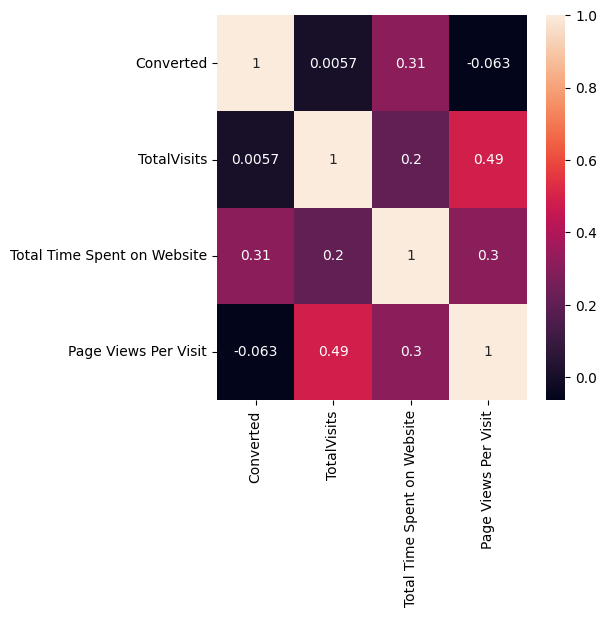

In [266]:
plt.figure(figsize=[5,5])
sns.heatmap(df_leads.corr(numeric_only=True) ,annot=True)
plt.show()

## 4.3 Pair Plots to verify the linear relationship

<Figure size 1000x1000 with 0 Axes>

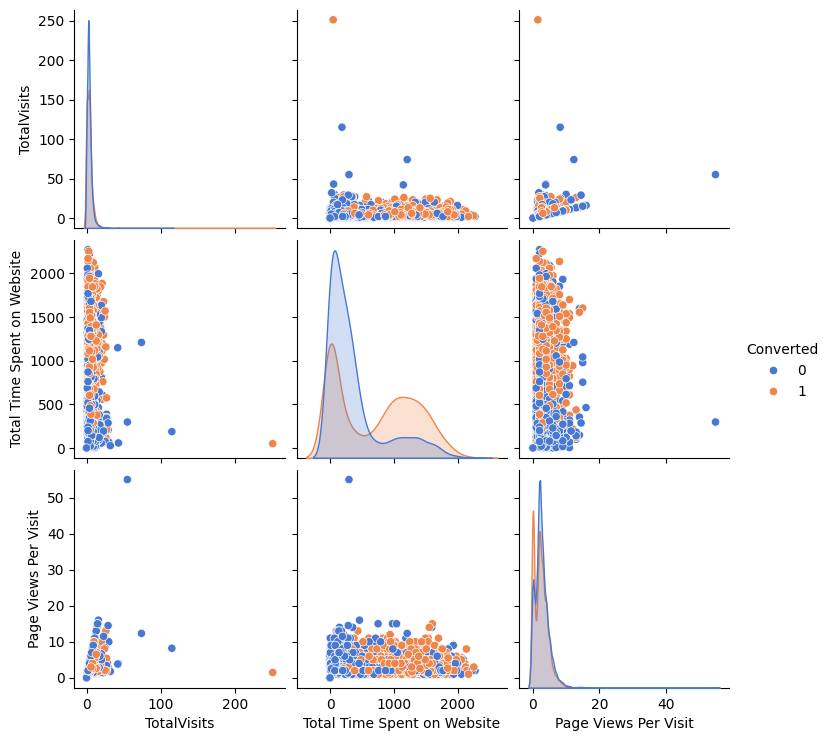

In [267]:
plt.figure(figsize=[10,10])
sns.pairplot(data=df_leads,hue='Converted')
plt.show()

**Inferences**  
From the categorical column distribution 
- Although most of the leads are Unemployed they only have a conversion rate of 42%
- 'Lead Add form' and 'References' have high conversion rate
- The conversion rate seems to be evenly distributed across all Specializations within 40% - 50%
- The most common last activity for converted customers seems to be SMS and Email  

From the Heatmap and Pair plots
- Target variable `Converted` seems to have a small linear correlation only with `Total Time spent on Website`

# 5. Develop the Logistic Regression model

## 5.1 Data Prep - Dummy variables

In [268]:
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [269]:
# Create dummy columns for Specialization
df_leads = pd.get_dummies(data=df_leads,columns=['Specialization'],dtype='int',drop_first=False)

In [270]:
# Drop Specialization_Select
df_leads.drop(columns=['Specialization_Select'],inplace=True)

In [271]:
# Create dummy columns for rest of the categorical columns
cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']
df_leads = pd.get_dummies(data=df_leads,columns=cols,dtype='int',drop_first=True)

In [272]:
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [273]:
df_leads.shape

(6373, 75)

## 5.2 Build the Model

### 5.2.1 Train/Test Data Split

In [274]:
# y to contain only target variable
y=df_leads.pop('Converted')

In [275]:
# X is all remaining variable also our independent variables
X=df_leads

In [323]:
# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=72)

In [324]:
print(f'{X_train.shape=}')
print(f'{y_train.shape=}')
print('\n')
print(f'{X_test.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(4461, 74)
y_train.shape=(4461,)


X_test.shape=(1912, 74)
y_test.shape=(1912,)


### 5.2.2 Feature Scaling

In [325]:
# Scale the numerical columns
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Use Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform training set only
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [326]:
# Inspect stats for Training set after scaling
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,...,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.014573,0.236301,0.154559,0.039229,0.051558,0.006725,0.011657,0.121497,0.017933,0.016140,...,0.318314,0.000224,0.002017,0.303071,0.012105,0.034073,0.296794,0.003587,0.004707,0.000224
std,0.022016,0.248719,0.130045,0.194161,0.221158,0.081739,0.107347,0.326741,0.132724,0.126028,...,0.465874,0.014972,0.044876,0.459637,0.109367,0.181437,0.456896,0.059788,0.068457,0.014972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003984,0.014525,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.011952,0.129842,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019920,0.452025,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [327]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1254,0.023904,0.457746,0.3750,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1706,0.019920,0.138204,0.3125,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5202,0.015936,0.096391,0.2500,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6698,0.007968,0.941901,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1919,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 5.2.3 Build a Model using RFE and Automated approach

Use RFE to eliminate some columns

In [328]:
LR = LogisticRegression()
rfe = RFE(estimator=LR, n_features_to_select=15)

In [329]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [330]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Specialization_Banking, Investment And Insurance', False, 8),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 31),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_Finance Management', False, 19),
 ('Specialization_Healthcare Management', False, 21),
 ('Specialization_Hospitality Management', False, 39),
 ('Specialization_Human Resource Management', False, 16),
 ('Specialization_IT Projects Management', False, 14),
 ('Specialization_International Business', False, 20),
 ('Specialization_Marketing Management', False, 12),
 ('Specialization_Media and Advertising', False, 18),
 ('Specialization_Operations Management', False, 17),
 ('Specialization_Retail Management', False, 45),
 ('Specialization_Rural and Agribusiness', False, 9),
 ('Specialization_Services Excellence', False, 44),
 ('Specialization_Supply Chain Management

In [331]:
cols_to_keep = X_train.columns[rfe.support_]
print(cols_to_keep)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


## 5.3 Develop the model using statsmodels

In [332]:
# Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial()).fit()
    print(lm.summary())
    return lm

In [333]:
# Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### 5.3.1 Model 1

In [334]:
lm_1 = build_model(cols_to_keep)
get_vif(cols_to_keep)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.6
Date:                Fri, 15 Nov 2024   Deviance:                       4079.3
Time:                        08:26:57   Pearson chi2:                 4.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3755
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Observations**
- There are some very high VIF values which can be dropped
- There are features with high p-values that can be dropped
- Let's drop the one with high VIF `Lead Origin_Lead Add Form`

In [335]:
dropped_cols = ['Lead Origin_Lead Add Form']
cols_to_keep = cols_to_keep.drop('Lead Origin_Lead Add Form')

### 5.3.2 Model 2

In [336]:
lm_2 = build_model(cols_to_keep)
get_vif(cols_to_keep)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.9
Date:                Fri, 15 Nov 2024   Deviance:                       4079.8
Time:                        08:28:28   Pearson chi2:                 4.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3754
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Observations**
- All the VIF values are below 5
- There are features with high p-values that can be dropped
- Let's drop `Last Notable Activity_Had a Phone Conversation`

In [337]:
dropped_cols.append('Last Notable Activity_Had a Phone Conversation')
cols_to_keep = cols_to_keep.drop('Last Notable Activity_Had a Phone Conversation')

### 5.3.3 Model 3

In [338]:
lm_3 = build_model(cols_to_keep)
get_vif(cols_to_keep)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.7
Date:                Fri, 15 Nov 2024   Deviance:                       4095.4
Time:                        08:29:38   Pearson chi2:                 4.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3732
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Observations**
- All the VIF values are below 5
- There are features with high p-values that can be dropped
- Let's drop `What is your current occupation_Student`

In [339]:
dropped_cols.append('What is your current occupation_Student')
cols_to_keep = cols_to_keep.drop('What is your current occupation_Student')

### 5.3.4 Model 4

In [340]:
lm_4 = build_model(cols_to_keep)
get_vif(cols_to_keep)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2049.6
Date:                Fri, 15 Nov 2024   Deviance:                       4099.2
Time:                        08:30:25   Pearson chi2:                 4.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3727
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Observations**
- All the VIF values are below 5
- There are features with high p-values that can be dropped
- Let's drop `What is your current occupation_Unemployed`

In [341]:
dropped_cols.append('What is your current occupation_Unemployed')
cols_to_keep = cols_to_keep.drop('What is your current occupation_Unemployed')

### 5.3.5 Model 5

In [342]:
lm_5 = build_model(cols_to_keep)
get_vif(cols_to_keep)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.4
Date:                Fri, 15 Nov 2024   Deviance:                       4100.8
Time:                        08:32:11   Pearson chi2:                 4.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Observations**
- All the VIF values are below 5
- The p-values are now in the acceptable range
- We can finalize this model and evaluate it

## 5.4 Model Evaluation 

### 5.4.1 Predict for Train dataset

In [343]:
X_train_sm = sm.add_constant(X_train[cols_to_keep])

y_train_pred = lm_5.predict(X_train_sm)

In [344]:
y_train_pred[:10]

1254    0.932122
1706    0.200783
5202    0.168865
6698    0.962452
1919    0.359681
2473    0.948219
5403    0.744547
261     0.153107
8363    0.642792
3186    0.636101
dtype: float64

In [345]:
y_train_pred = y_train_pred.values.reshape(-1)

In [346]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Prob_Converted': y_train_pred})

In [347]:
y_train_pred_final.head()

,Converted,Prob_Converted
0,1,0.932122
1,0,0.200783
2,0,0.168865
3,1,0.962452
4,0,0.359681


In [348]:
# Set the cutoff of 0.5 the probabilities for initial analysis
cut_off = 0.5

In [349]:
y_train_pred_final['Predicted'] = y_train_pred_final['Prob_Converted'].map(lambda x: 0 if x<cut_off else 1)

In [350]:
y_train_pred_final.head()

,Converted,Prob_Converted,Predicted
0,1,0.932122,1
1,0,0.200783,0
2,0,0.168865,0
3,1,0.962452,1
4,0,0.359681,0


In [351]:
def calculate_metrics(act, pred):
    accuracy = metrics.accuracy_score(act,pred)
    print(f'{accuracy=}')

    precision = metrics.precision_score(act,pred)
    print(f'{precision=}')

    recall = metrics.recall_score(act,pred)
    print(f'{recall=}')

    confusion_matrix = metrics.confusion_matrix(act,pred)
    TP = confusion_matrix[1,1] # true positive 
    TN = confusion_matrix[0,0] # true negatives
    FP = confusion_matrix[0,1] # false positives
    FN = confusion_matrix[1,0] # false negatives
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    
    print(f'{sensitivity=}')
    print(f'{specificity=}')
    print(f'{confusion_matrix=}')


In [352]:
calculate_metrics(act=y_train_pred_final['Converted'],pred=y_train_pred_final['Predicted'])

accuracy=0.7872674288276171
precision=0.8049519959575543
recall=0.7388682745825603
sensitivity=0.7388682745825603
specificity=0.8325379609544469
confusion_matrix=array([[1919,  386],
       [ 563, 1593]], dtype=int64)


|Actual v /Predicted > |not_converted|converted|
|---|---|---|
|not_converted|1919|386|
|converted|563|1593|

## 5.5 Plot ROC curve

In [353]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [354]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Prob_Converted'], drop_intermediate = False )

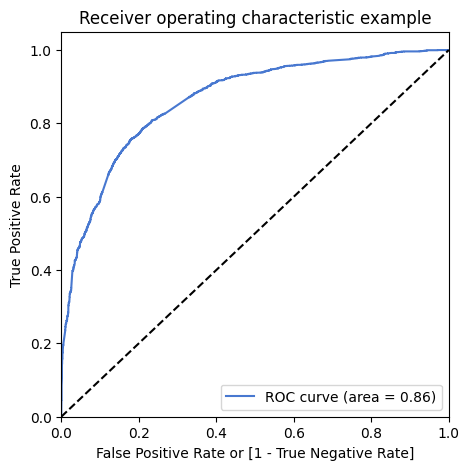

In [355]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Prob_Converted'])

## 5.6 Finding Optimal cutoff point

In [356]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Prob_Converted'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Prob_Converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.932122,1,1,1,1,1,1,1,1,1,1,1
1,0,0.200783,0,1,1,1,0,0,0,0,0,0,0
2,0,0.168865,0,1,1,0,0,0,0,0,0,0,0
3,1,0.962452,1,1,1,1,1,1,1,1,1,1,1
4,0,0.359681,0,1,1,1,1,0,0,0,0,0,0


In [357]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion_matrix[1,1] # true positive 
# TN = confusion_matrix[0,0] # true negatives
# FP = confusion_matrix[0,1] # false positives
# FN = confusion_matrix[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.483300     1.000000     0.000000
0.1          0.1  0.555033     0.992115     0.146204
0.2          0.2  0.706344     0.938312     0.489371
0.3          0.3  0.755660     0.902597     0.618221
0.4          0.4  0.784802     0.801484     0.769197
0.5          0.5  0.787267     0.738868     0.832538
0.6          0.6  0.776956     0.676716     0.870716
0.7          0.7  0.743555     0.553803     0.921041
0.8          0.8  0.715759     0.458720     0.956182
0.9          0.9  0.644474     0.283395     0.982213


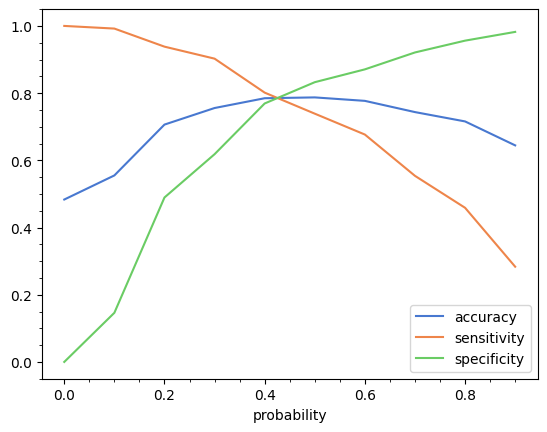

In [358]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.minorticks_on()
plt.show()

**Observations**  
- From the curve above the probability of **0.42** seems to be optimal cutoff


In [359]:
optimal_cut_off = 0.42

In [360]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Prob_Converted'].map( lambda x: 1 if x > optimal_cut_off else 0)
y_train_pred_final.head()

,Converted,Prob_Converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.932122,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.200783,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.168865,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.962452,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.359681,0,1,1,1,1,0,0,0,0,0,0,0


In [361]:
calculate_metrics(act=y_train_pred_final['Converted'],pred=y_train_pred_final['Final_Predicted'])

accuracy=0.7868190988567586
precision=0.7727478497057492
recall=0.7917439703153989
sensitivity=0.7917439703153989
specificity=0.7822125813449023
confusion_matrix=array([[1803,  502],
       [ 449, 1707]], dtype=int64)


|Actual v /Predicted > |not_converted|converted|
|---|---|---|
|not_converted|1803|502|
|converted|449|1707|

## 5.7 Precision and recall tradeoff

In [362]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Prob_Converted'])

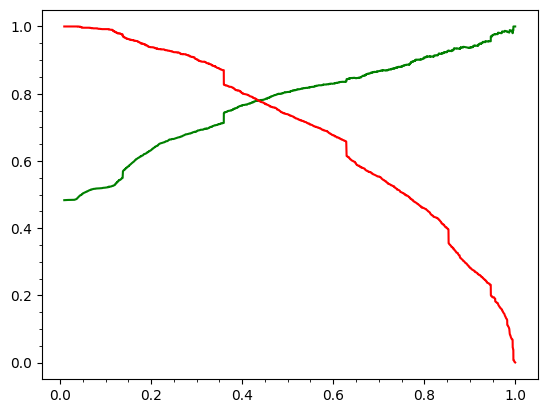

In [363]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.minorticks_on()
plt.show()

# 6. Making predictions on Test data

## 6.1 Scaling

In [364]:
# Scale the numerical columns that have different scales
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Transform test set
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [365]:
X_test_sm = sm.add_constant(X_test[cols_to_keep])

y_test_pred = lm_5.predict(X_test_sm)

In [366]:
y_test_pred[:10]

3579    0.148130
4051    0.726598
2150    0.137288
5482    0.183585
8006    0.150949
4123    0.995847
2481    0.945945
8019    0.579046
6665    0.959092
3892    0.137576
dtype: float64

In [367]:
y_test_pred = y_test_pred.values.reshape(-1)

In [368]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Prob_Converted': y_test_pred})

In [369]:
# Using the optimal cutoff  
y_test_pred_final['Predicted'] = y_test_pred_final['Prob_Converted'].map(lambda x: 0 if x < optimal_cut_off else 1)

In [370]:
calculate_metrics(act=y_test_pred_final['Converted'],pred=y_test_pred_final['Predicted'])

accuracy=0.7918410041841004
precision=0.7780195865070729
recall=0.7865786578657866
sensitivity=0.7865786578657866
specificity=0.7966101694915254
confusion_matrix=array([[799, 204],
       [194, 715]], dtype=int64)


|Actual v /Predicted > |not_converted|converted|
|---|---|---|
|not_converted|799|204|
|converted|194|715|

In [371]:
cols_to_keep

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

## 6.2 Final feature list
- TotalVisits 
- Total Time Spent on Website 
- Lead Source_Olark Chat 
- Lead Source_Reference 
- Lead Source_Welingak Website 
- Do Not Email_Yes 
- Last Activity_Converted to Lead 
- Last Activity_Olark Chat Conversation 
- Last Activity_SMS Sent
- What is your current occupation_Working Professional
- Last Notable Activity_Unreachable